# Importing Library

In [1]:
import numpy as np
import pandas as pd
import spacy
import string
import gensim
import operator
import re

In [5]:
data_bengkel = pd.read_csv('/content/data_bengkel.csv')
data_bengkel.head()

,nama,photo,alamat,latitude,longitude,kontak,jam operasional,fitur
0,bengkel mobil mas mono,https://www.google.com/maps/place/Bengkel+Mobi...,"Jl. Bekasi Tim. Raya No.176, RT.1/RW.6, Cipina...",-6.214579,106.886882,8.211367e+10,"senin - sabtu 08.30 - 17.30, minggu tutup",menerima segala jenis perbaikan masalah mobil
1,bengkel mobil pawang,https://www.google.com/maps/place/Bengkel+Mobi...,"Jl. Delima Raya No.10, RT.2/RW.5, Malaka Sari,...",-6.221298,106.926501,2.186005e+08,senin - minggu 08.00 - 17.00,menerima segala jenis perbaikan masalah mobil
2,bengkel mobil anugerah 2,https://www.google.com/maps/place/Bengkel+Mobi...,"4, Jl. Klp. Sawit Raya No.21, RT.4/RW.7, Pd. K...",-6.240361,106.926209,8.138057e+10,"senin - sabtu 08.00 - 17.00, minggu tutup","ganti oli, tune up, overhaul, dan perbaikan tr..."
3,bengkel mobil almet spesialis matic,https://www.google.com/maps/place/Bengkel+Mobi...,"Jl. Jend. Basuki Rachmat No.2, RW.6, Cipinang ...",-6.227173,106.883561,8.129113e+10,senin - minggu 07.30 - 17.00,"servis perbaikan AC, perbaikan rem mobil, powe..."
4,bengkel mobil 32 motor,https://www.google.com/maps/place/Bengkel+Mobi...,"Jl. Cipinang Baru Raya No.32, RW.12, Cipinang,...",-6.204389,106.887831,2.147180e+08,"senin - sabtu 08.00 - 17.00, minggu tutup","body repair, ketok magic, pengecatan mobil"


# Data Pre-Processing and Data Cleaning

In [7]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#membuat daftar tanda baca dan stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):

    #menghapus tanda kutip tunggal
    sentence = re.sub('\'','',sentence)

    #menghapus angka dan kata yang mengandung angka
    sentence = re.sub('\w*\d\w*','',sentence)

    #menggati spasi tambahan dengan spasi tunggal
    sentence = re.sub(' +',' ',sentence)

    #menghapus baris yang tidak diinginkan dimulai dari karakter khusus
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #hapus karakter baris baru yang tidak terputus
    sentence = re.sub(r'\n',' ',sentence)

    #menghapus tanda kutip
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #membuat object token
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]

    #menghapus stopwords, dan mengecualikan kata yang kurang dari 2 karakter
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    #return tokens
    return tokens

In [8]:
print ('Cleaning and Tokenizing...')
%time data_bengkel['alamat_tokenized'] = data_bengkel['alamat'].map(lambda x: spacy_tokenizer(x))

data_bengkel.head()

Cleaning and Tokenizing...
CPU times: user 1.79 s, sys: 6.63 ms, total: 1.8 s
Wall time: 1.84 s


,nama,photo,alamat,latitude,longitude,kontak,jam operasional,fitur,alamat_tokenized
0,bengkel mobil mas mono,https://www.google.com/maps/place/Bengkel+Mobi...,"Jl. Bekasi Tim. Raya No.176, RT.1/RW.6, Cipina...",-6.214579,106.886882,8.211367e+10,"senin - sabtu 08.30 - 17.30, minggu tutup",menerima segala jenis perbaikan masalah mobil,"[bekasi, tim, raya, cipinang, muara, kecamatan..."
1,bengkel mobil pawang,https://www.google.com/maps/place/Bengkel+Mobi...,"Jl. Delima Raya No.10, RT.2/RW.5, Malaka Sari,...",-6.221298,106.926501,2.186005e+08,senin - minggu 08.00 - 17.00,menerima segala jenis perbaikan masalah mobil,"[delima, raya, malaka, sari, kec, duren, sawit..."
2,bengkel mobil anugerah 2,https://www.google.com/maps/place/Bengkel+Mobi...,"4, Jl. Klp. Sawit Raya No.21, RT.4/RW.7, Pd. K...",-6.240361,106.926209,8.138057e+10,"senin - sabtu 08.00 - 17.00, minggu tutup","ganti oli, tune up, overhaul, dan perbaikan tr...","[klp, sawit, raya, klp, kec, duren, sawit, kot..."
3,bengkel mobil almet spesialis matic,https://www.google.com/maps/place/Bengkel+Mobi...,"Jl. Jend. Basuki Rachmat No.2, RW.6, Cipinang ...",-6.227173,106.883561,8.129113e+10,senin - minggu 07.30 - 17.00,"servis perbaikan AC, perbaikan rem mobil, powe...","[jend, basuki, rachmat, cipinang, muara, kecam..."
4,bengkel mobil 32 motor,https://www.google.com/maps/place/Bengkel+Mobi...,"Jl. Cipinang Baru Raya No.32, RW.12, Cipinang,...",-6.204389,106.887831,2.147180e+08,"senin - sabtu 08.00 - 17.00, minggu tutup","body repair, ketok magic, pengecatan mobil","[cipinang, baru, raya, cipinang, kec, pulo, ga..."


In [9]:
alamat_plot = data_bengkel['alamat_tokenized']
alamat_plot[0:5]

0    [bekasi, tim, raya, cipinang, muara, kecamatan...
1    [delima, raya, malaka, sari, kec, duren, sawit...
2    [klp, sawit, raya, klp, kec, duren, sawit, kot...
3    [jend, basuki, rachmat, cipinang, muara, kecam...
4    [cipinang, baru, raya, cipinang, kec, pulo, ga...
Name: alamat_tokenized, dtype: object

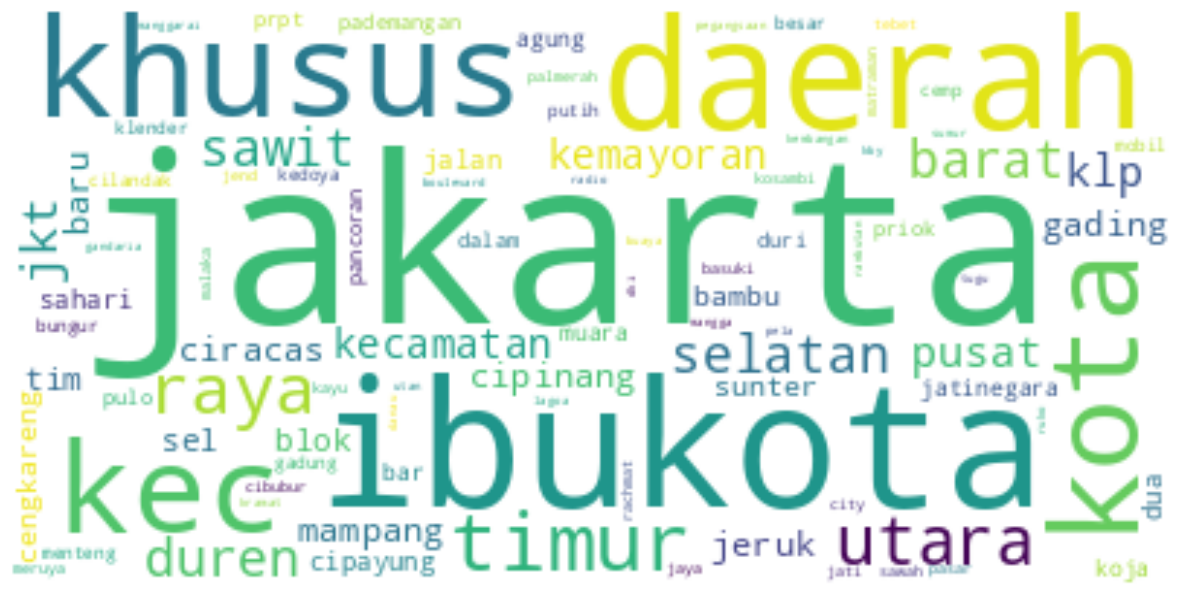

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(alamat_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
from gensim import corpora

#membuat term dict
%time dictionary = corpora.Dictionary(alamat_plot)

#daftar beberapa yang dapat dihapus lebih lanjut
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

CPU times: user 4.26 ms, sys: 3 µs, total: 4.26 ms
Wall time: 4.28 ms


In [13]:
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key,
                value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['bekasi', 0], ['cipinang', 1], ['daerah', 2], ['ibukota', 3], ['jakarta', 4], ['jatinegara', 5], ['kecamatan', 6], ['khusus', 7], ['kota', 8], ['muara', 9], ['raya', 10], ['tim', 11], ['timur', 12], ['delima', 13], ['duren', 14], ['kec', 15], ['malaka', 16], ['sari', 17], ['sawit', 18], ['klp', 19], ['basuki', 20], ['jend', 21], ['rachmat', 22], ['baru', 23], ['gadung', 24], ['pulo', 25], ['durensawit', 26], ['lkr', 27], ['cipayung', 28], ['dalang', 29], ['munjul', 30], ['inten', 31], ['klender', 32], ['radin', 33], ['bambu', 34], ['pahlawan', 35], ['revolusi', 36], ['banjir', 37], ['inspeksi', 38], ['jalur', 39], ['kanal', 40], ['kopi', 41], ['pondok', 42], ['ciracas', 43], ['rambutan', 44], ['simatupang', 45], ['teratai', 46], ['center', 47], ['dermaga', 48], ['komplek', 49], ['ruko', 50]]]


In [15]:
corpus = [dictionary.doc2bow(desc) for desc in alamat_plot]

word_freqs = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_freqs)

[[('bekasi', 1), ('cipinang', 1), ('daerah', 1), ('ibukota', 1), ('jakarta', 2), ('jatinegara', 1), ('kecamatan', 1), ('khusus', 1), ('kota', 1), ('muara', 1), ('raya', 1), ('tim', 1), ('timur', 1)], [('daerah', 1), ('ibukota', 1), ('jakarta', 2), ('khusus', 1), ('kota', 1), ('raya', 1), ('timur', 1), ('delima', 1), ('duren', 1), ('kec', 1), ('malaka', 1), ('sari', 1), ('sawit', 1)], [('daerah', 1), ('ibukota', 1), ('jakarta', 2), ('khusus', 1), ('kota', 1), ('raya', 1), ('timur', 1), ('duren', 1), ('kec', 1), ('sawit', 2), ('klp', 2)]]


# Build Tf-Idf and LSI Model

In [19]:
%time alamat_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time alamat_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)

CPU times: user 1.78 ms, sys: 0 ns, total: 1.78 ms
Wall time: 2.35 ms
CPU times: user 81.4 ms, sys: 44.9 ms, total: 126 ms
Wall time: 135 ms


In [37]:
%time gensim.corpora.MmCorpus.serialize('alamat_tfidf_model_mm', alamat_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('alamat_lsi_model_mm', alamat_lsi_model[alamat_tfidf_model[corpus]])

CPU times: user 23 ms, sys: 833 µs, total: 23.8 ms
Wall time: 72.9 ms
CPU times: user 112 ms, sys: 3.06 ms, total: 115 ms
Wall time: 207 ms


In [38]:
alamat_tfidf_corpus = gensim.corpora.MmCorpus('alamat_tfidf_model_mm')
alamat_lsi_corpus = gensim.corpora.MmCorpus('alamat_lsi_model_mm')

print(alamat_tfidf_corpus)
print(alamat_lsi_corpus)

MmCorpus(150 documents, 298 features, 1580 non-zero entries)
MmCorpus(150 documents, 142 features, 21152 non-zero entries)


In [39]:
from gensim.similarities import MatrixSimilarity

%time alamat_index = MatrixSimilarity(alamat_lsi_corpus, num_features = alamat_lsi_corpus.num_terms)

CPU times: user 26.9 ms, sys: 0 ns, total: 26.9 ms
Wall time: 28 ms


In [53]:
alamat_tfidf_model.save('tfidf_model.h5')
alamat_lsi_model.save('lsi_model.h5')

# Semantic Search Engine

In [47]:
from operator import itemgetter
import pandas as pd

def search_repair_shop(search_term):
    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = alamat_tfidf_model[query_bow]
    query_lsi = alamat_lsi_model[query_tfidf]

    alamat_index.num_best = 5

    alamat_list = alamat_index[query_lsi]

    alamat_list.sort(key=itemgetter(1), reverse=True)
    result = []

    for j, alamat in enumerate(alamat_list):
        result.append({
            'Relevance': round((alamat[1] * 100), 2),
            'Nama Bengkel': data_bengkel['nama'][alamat[0]],
            'Alamat': data_bengkel['alamat'][alamat[0]]
        })

        if j == (alamat_index.num_best - 1):
            break

    return pd.DataFrame(result, columns=['Relevance', 'Nama Bengkel', 'Alamat'])

In [48]:
search_repair_shop('Bekasi Tim. Raya')

,Relevance,Nama Bengkel,Alamat
0,68.96,bengkel mobil mas mono,"Jl. Bekasi Tim. Raya No.176, RT.1/RW.6, Cipina..."
1,54.39,bengkel cat mobil 123,"Jl. Bekasi Timur Raya, Cipinang, Kec. Pulo Gad..."
2,29.24,bengkel mobil,"Gg. 15 No.40, Pademangan Tim., Jakarta, Jkt Ut..."
3,19.31,AGS bengkel mobil Kemayoran,"Jl. Ps. Mobil Kemayoran, RW.10, Pademangan Tim..."
4,18.50,bengkel mobil jim motor,"Ps. Mobil Kemayoran, RW.10, Pademangan Tim., K..."
